<a href="https://colab.research.google.com/github/Elmir22/Data-science/blob/main/unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#k-means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np

#extra code - the  exact arguments of make_blobs() are not important
blob_centers = np.array([[0.2, 2.3],[-1.5, 2.3],[-2.8, 1.8],
                         [-2.8, 2.8], [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers= blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

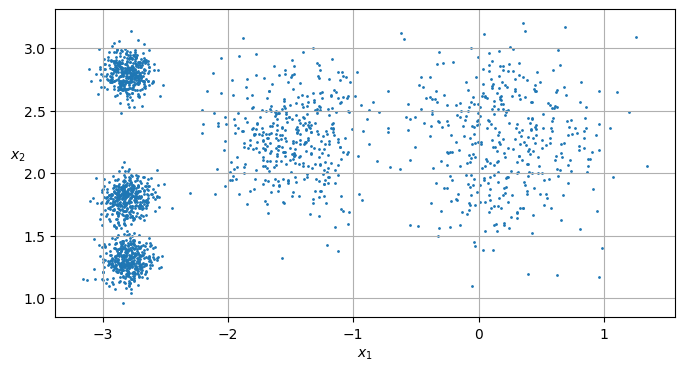

In [ ]:
import matplotlib.pyplot as plt
def plot_clusters(X,y=None):
  plt.scatter(X[:, 0], X[:,1], c=y, s=1)
  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8,4))
plot_clusters(X)
plt.grid()
plt.show()

In [ ]:
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [ ]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [ ]:
y_pred is kmeans.labels_

True

In [ ]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [ ]:
import numpy as np

X_new = np.array([[0,2], [3,2], [-3,3], [-3,2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

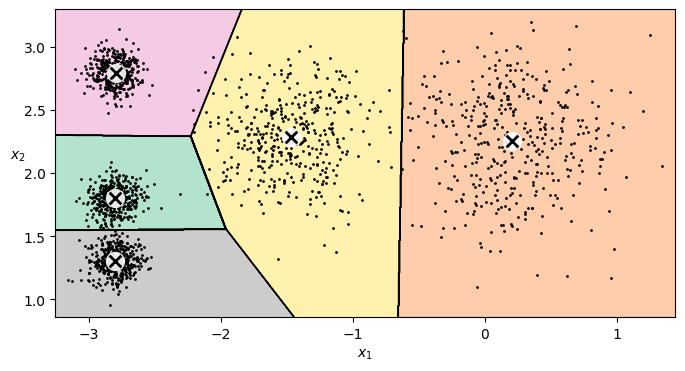

In [ ]:
def plot_data(X):
   plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)


def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
   if weights is not None:
       centroids = centroids[weights > weights.max() / 10]
   plt.scatter(centroids[:, 0], centroids[:, 1],
               marker='o', s=35, linewidths=8,
               color=circle_color, zorder=10, alpha=0.9)
   plt.scatter(centroids[:, 0], centroids[:, 1],
               marker='x', s=2, linewidths=12,
               color=cross_color, zorder=11, alpha=1)


def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                            show_xlabels=True, show_ylabels=True):
   mins = X.min(axis=0) - 0.1
   maxs = X.max(axis=0) + 0.1
   xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                        np.linspace(mins[1], maxs[1], resolution))
   Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
   Z = Z.reshape(xx.shape)


   plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               cmap="Pastel2")
   plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
               linewidths=1, colors='k')
   plot_data(X)
   if show_centroids:
       plot_centroids(clusterer.cluster_centers_)


   if show_xlabels:
       plt.xlabel("$x_1$")
   else:
       plt.tick_params(labelbottom=False)
   if show_ylabels:
       plt.ylabel("$x_2$", rotation=0)
   else:
       plt.tick_params(labelleft=False)


plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()


In [ ]:
kmeans.transform(X_new).round(2)

array([[2.81, 0.33, 2.9 , 1.49, 2.89],
       [5.81, 2.8 , 5.85, 4.48, 5.84],
       [1.21, 3.29, 0.29, 1.69, 1.71],
       [0.73, 3.22, 0.36, 1.55, 1.22]])

#The k-means

In [ ]:
good_init = np.array([[-3,3],[-3,2],[-3,1],[-1,2],[0,2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

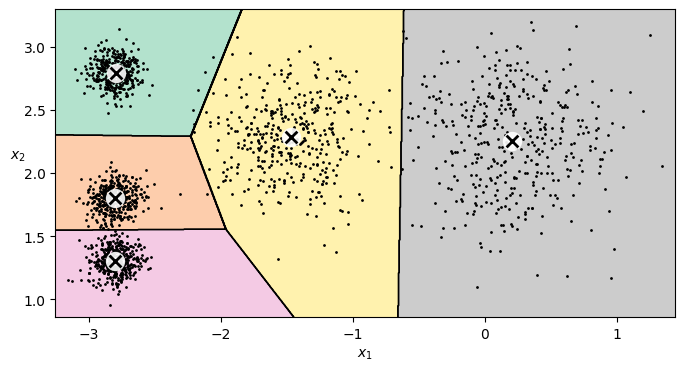

In [ ]:
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans, X)

In [ ]:
kmeans.inertia_

211.5985372581684

In [ ]:
kmeans.score(X)

-211.59853725816836

In [ ]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                          random_state=2)
kmeans_rnd_10_inits.fit(X)

KMeans(init='random', n_clusters=5, n_init=10, random_state=2)

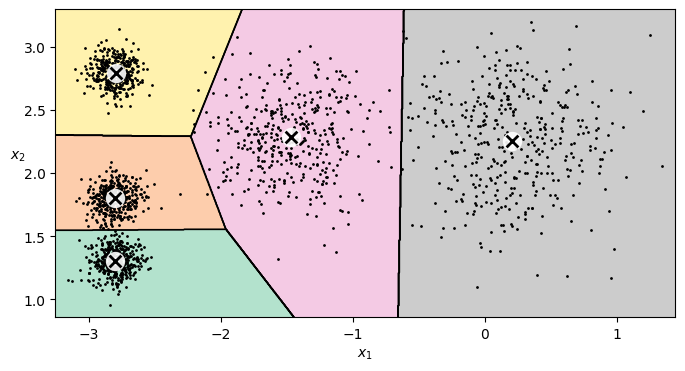

In [ ]:
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans_rnd_10_inits,X)
plt.show()

In [ ]:
kmeans_rnd_10_inits.inertia_

211.5985372581684

#Mini-batch k-means

In [ ]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, n_init=3, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, n_init=3, random_state=42)

In [ ]:
minibatch_kmeans.inertia_

211.65239850433215

In [ ]:
kmeans_k3 = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, n_init=10, random_state=42)

#plot_clusterer_comparions(kmeans_k3, kmeans_k8)

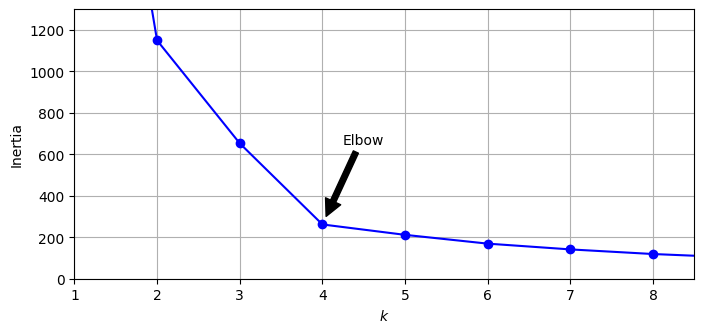

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
 for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8,3.5))
plt.plot(range(1,10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1,8.5,0,1300])
plt.grid()
plt.show()


#limits of K-Means

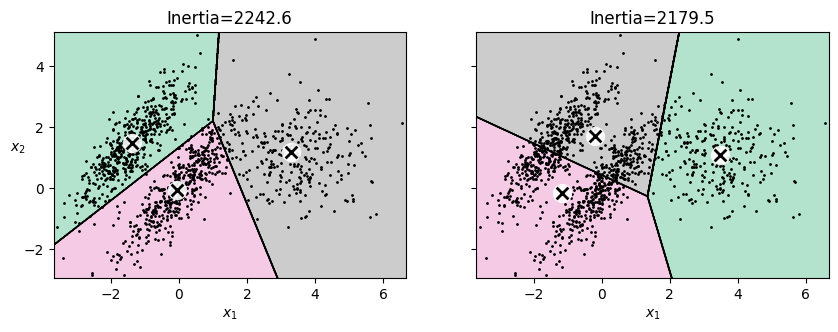

In [ ]:
X1, y1 = make_blobs(n_samples=1000, centers=((4,-4), (0,0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2+ [6,-8]
X = np.r_[X1, X2]
y= np.r_[y1, y2]

kmeans_good = KMeans(n_clusters=3,
                     init= np.array([[-1.5,2.5],[0.5,0],[4,0]]),
                     n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, n_init=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

plt.figure(figsize=(10,3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title(f"Inertia={kmeans_good.inertia_:.1f}")


plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title(f"Inertia={kmeans_bad.inertia_:.1f}")

plt.show()

In [ ]:
import PIL

image = np.asarray(PIL.Image.open("/content/ladybug.png"))
image.shape

(533, 800, 3)

In [ ]:
X = image.reshape(-1,3)
kmeans = KMeans(n_clusters=8, n_init=10, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [ ]:
kmeans.cluster_centers_

array([[250.80339083, 238.65268971,   6.56603259],
       [  5.83448628,  28.22616668,   1.47552886],
       [ 55.88206518,  98.62346563,  14.79208777],
       [193.20797818,  54.13433345,  11.37470167],
       [ 25.47759236,  64.83281062,   4.31953567],
       [156.22887957, 160.67579389,  98.81396046],
       [ 94.89017515, 133.51803159,  40.11328915],
       [225.57151644, 185.02493849,   8.77650414]])

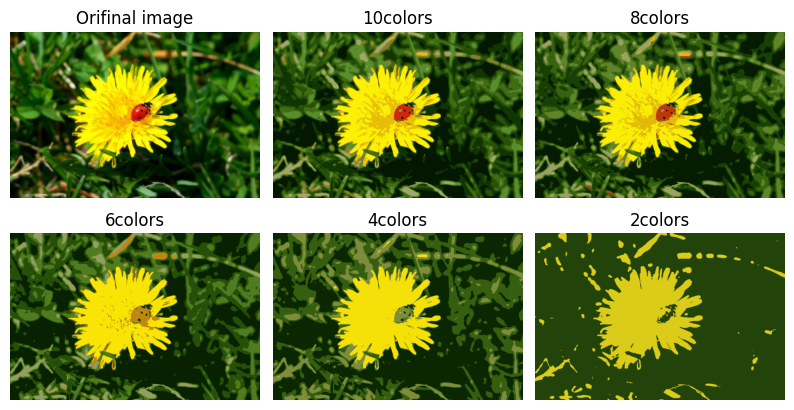

In [ ]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
  kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42).fit(X)
  segmented_img = kmeans.cluster_centers_[kmeans.labels_]
  segmented_imgs.append(segmented_img.reshape(image.shape))


plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2,3,1)
plt.imshow(image)
plt.title("Orifinal image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
  plt.subplot(2, 3, 2+idx)
  plt.imshow(segmented_imgs[idx]/255)
  plt.title(f"{n_clusters}colors")
  plt.axis('off')

plt.show()

#Using Clustering for Semi-Supervised Learning

In [ ]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [ ]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [ ]:
log_reg.score(X_test, y_test)

0.7481108312342569

In [ ]:
log_reg_full = LogisticRegression(max_iter=10_000)
log_reg_full.fit(X_train, y_train)
log_reg_full.score(X_test, y_test)

0.906801007556675

In [ ]:
k = 50
kmeans= KMeans(n_clusters=k, n_init=10, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = X_digits_dist.argmin(axis=0)
X_representative_digits = X_train[representative_digit_idx]

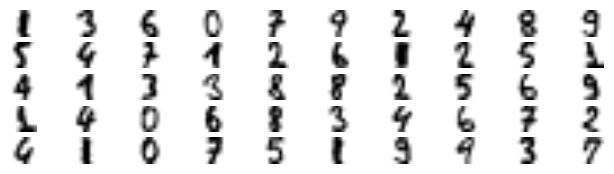

In [ ]:
plt.figure(figsize=(8,2))
for index, X_representative_digit in enumerate(X_representative_digits):
  plt.subplot(k//10,10,index+1)
  plt.imshow(X_representative_digit.reshape(8,8), cmap="binary",
             interpolation="bilinear")
  plt.axis('off')

plt.show()

In [ ]:
y_representative_digits = np.array([
    1,3,6,0,7,9,2,4,8,9,
    5,4,7,1,2,6,1,2,5,1,
    4,1,3,3,8,8,2,5,6,9,
    1,4,0,6,8,3,4,6,7,2,
    4,1,0,7,5,1,9,9,3,7
])

In [ ]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8488664987405542

In [ ]:
log_reg.score(X_train, y_train)

0.9421428571428572

In [ ]:
y_train_propagated= np.empty(len(X_train), dtype= np.int64)
for i in range(k):
  y_train_propagated[kmeans.labels_ ==i] = y_representative_digits[i]

In [ ]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=10000)

In [ ]:
log_reg.score(X_test, y_test)

0.8942065491183879

In [ ]:
log_reg.score(X_train, y_train)

0.9678571428571429

In [ ]:
percentile_closest = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
  in_cluster = (kmeans.labels_ == i)
  cluster_dist = X_cluster_dist[in_cluster]
  cutoff_distance = np.percentile(cluster_dist, percentile_closest)
  above_cutoff = (X_cluster_dist> cutoff_distance)
  X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [ ]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9093198992443325

In [ ]:
(y_train_partially_propagated == y_train[partially_propagated]).mean()

0.9755555555555555

#DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [ ]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [ ]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [ ]:
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

#Gaussian mixtures

In [ ]:
X1, y1 = make_blobs(n_samples=1000, centers=((4,-4), (0,0)), random_state=42)
X1 = X1.dot(np.array(([0.374, 0.95], [0.732, 0.598])))
X2, y2 = make_blobs(n_samples=250, centers = 1, random_state=42)
X2 = X2 + [6,-8]
X = np.r_[X1,X2]
y= np.r_[y1,y2]

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [ ]:
gm.weights_

array([0.39025715, 0.40007391, 0.20966893])

In [ ]:
gm.means_

array([[ 0.05131611,  0.07521837],
       [-1.40763156,  1.42708225],
       [ 3.39893794,  1.05928897]])

In [ ]:
gm.n_iter_

4

In [ ]:
gm.covariances_

array([[[ 0.68799922,  0.79606357],
        [ 0.79606357,  1.21236106]],

       [[ 0.63479409,  0.72970799],
        [ 0.72970799,  1.1610351 ]],

       [[ 1.14833585, -0.03256179],
        [-0.03256179,  0.95490931]]])

In [ ]:
gm.predict(X)

array([0, 0, 1, ..., 2, 2, 2])

In [ ]:
gm.predict_proba(X).round(3)

array([[0.977, 0.   , 0.023],
       [0.983, 0.001, 0.016],
       [0.   , 1.   , 0.   ],
       ...,
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ]])

In [ ]:
X_new , y_new = gm.sample(6)
X_new       #activ leaning en ehemiyyetli oldugu yoxlayir onun uzerinde isleyir vaxta qenaet etmek baximdan daha yaxsidir

array([[-0.86944074, -0.32767626],
       [ 0.29836051,  0.28297011],
       [-2.8014927 , -0.09047309],
       [ 3.98203732,  1.49951491],
       [ 3.81677148,  0.53095244],
       [ 2.84104923, -0.73858639]])

In [ ]:
y_new

array([0, 0, 1, 2, 2, 2])

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
face = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
print(face)

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32), 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
         0.3305785 , 0.30578512],
        [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
         0.338843  , 0.3140496 ],
        [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
         0.338843  , 0.29752067],
        ...,
        [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
         0.16528925, 0.17

#cluster the olivetti faces dataset

In [ ]:
face.target


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split= StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(face.data,
                                                   face.target))

X_train_valid = face.data[train_valid_idx]
y_train_valid = face.target[train_valid_idx]
X_test = face.data[test_idx]
y_test= face.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [ ]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

199

In [ ]:
from sklearn.cluster import KMeans

k_range = range(5,150,5)
kmeans_per_k= []
for k in k_range:
  print(f"k={k}")
  kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
  kmeans.fit(X_train_pca)
  kmeans_per_k.append(kmeans)


k=5
k=10
k=15
k=20
k=25
k=30
k=35
k=40
k=45
k=50
k=55
k=60
k=65
k=70
k=75
k=80
k=85
k=90
k=95
k=100
k=105
k=110
k=115
k=120
k=125
k=130
k=135
k=140
k=145


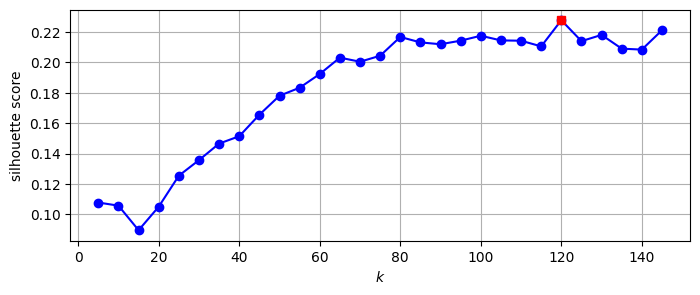

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                    for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8,3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("silhouette score")
plt.plot(best_k , best_score, "rs")
plt.grid()
plt.show()

In [ ]:
  best_score

0.22782247

In [ ]:
X_train.shape

(280, 4096)

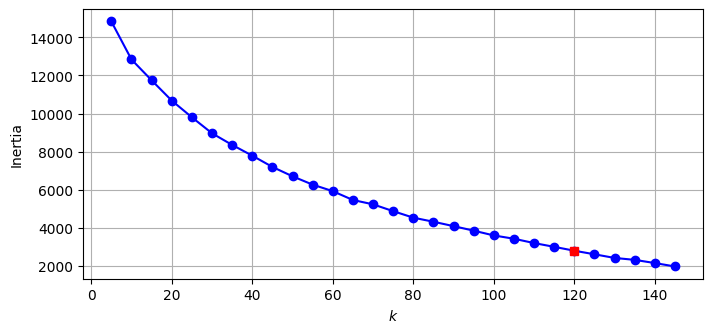

In [ ]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.plot(best_k, best_inertia, "rs")
plt.grid()
plt.show()

In [ ]:
best_model = kmeans_per_k[best_index]

Cluster 0


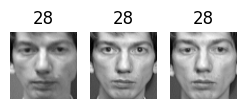

Cluster 1


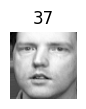

Cluster 2


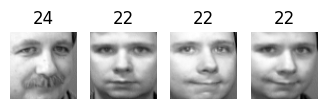

Cluster 3


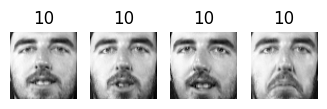

Cluster 4


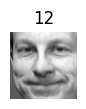

Cluster 5


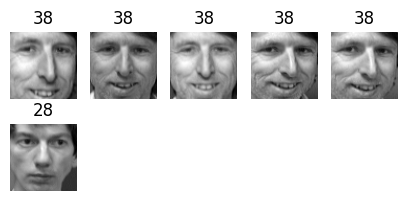

Cluster 6


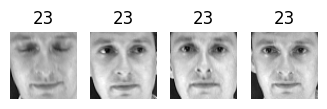

Cluster 7


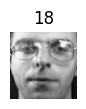

Cluster 8


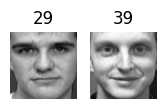

Cluster 9


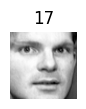

Cluster 10


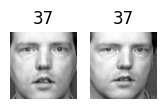

Cluster 11


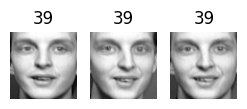

Cluster 12


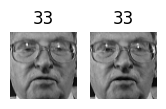

Cluster 13


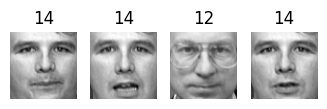

Cluster 14


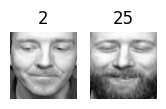

Cluster 15


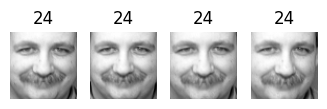

Cluster 16


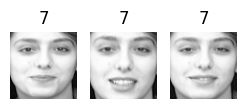

Cluster 17


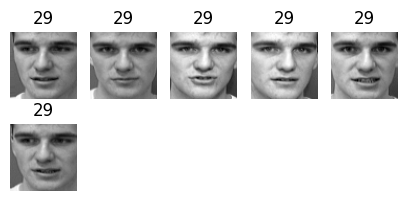

Cluster 18


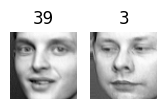

Cluster 19


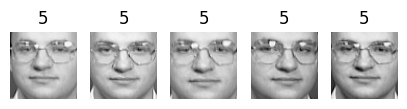

Cluster 20


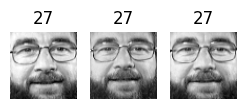

Cluster 21


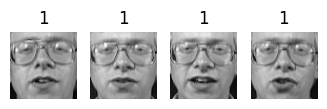

Cluster 22


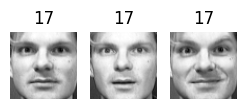

Cluster 23


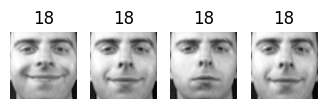

Cluster 24


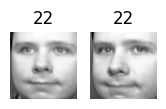

Cluster 25


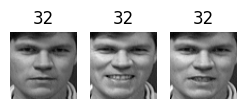

Cluster 26


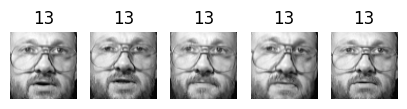

Cluster 27


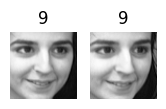

Cluster 28


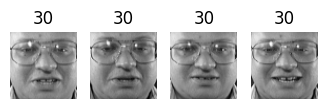

Cluster 29


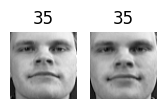

Cluster 30


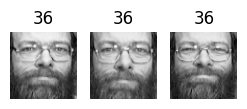

Cluster 31


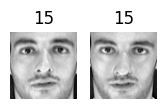

Cluster 32


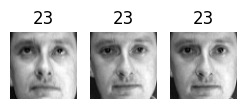

Cluster 33


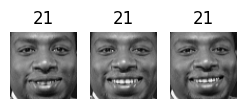

Cluster 34


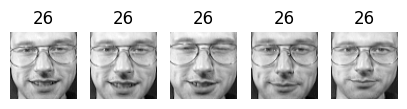

Cluster 35


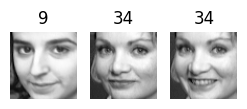

Cluster 36


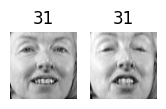

Cluster 37


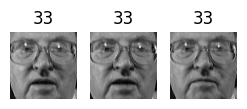

Cluster 38


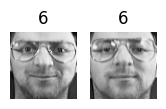

Cluster 39


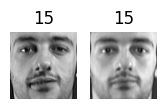

Cluster 40


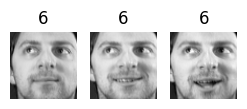

Cluster 41


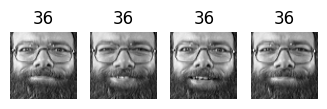

Cluster 42


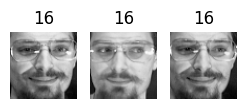

Cluster 43


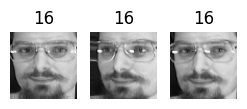

Cluster 44


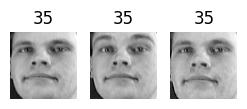

Cluster 45


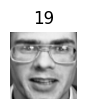

Cluster 46


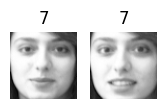

Cluster 47


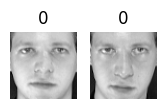

Cluster 48


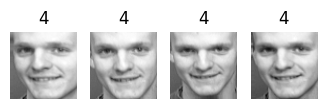

Cluster 49


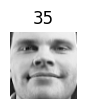

Cluster 50


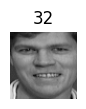

Cluster 51


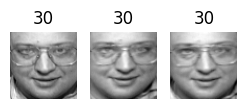

Cluster 52


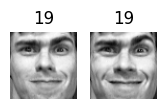

Cluster 53


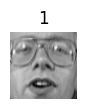

Cluster 54


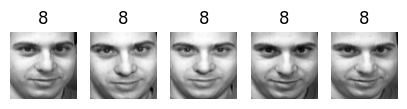

Cluster 55


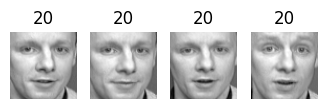

Cluster 56


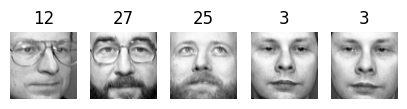

Cluster 57


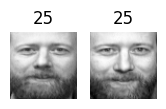

Cluster 58


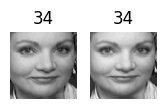

Cluster 59


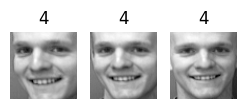

Cluster 60


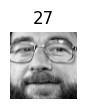

Cluster 61


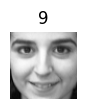

Cluster 62


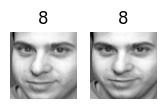

Cluster 63


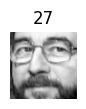

Cluster 64


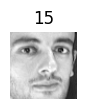

Cluster 65


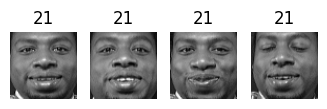

Cluster 66


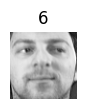

Cluster 67


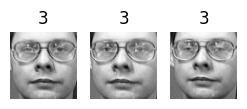

Cluster 68


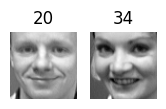

Cluster 69


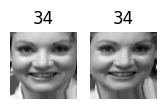

Cluster 70


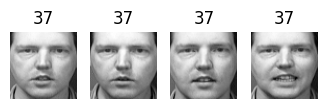

Cluster 71


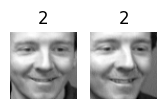

Cluster 72


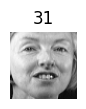

Cluster 73


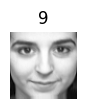

Cluster 74


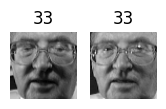

Cluster 75


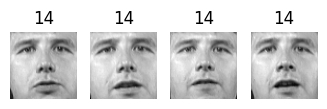

Cluster 76


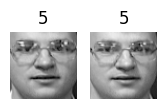

Cluster 77


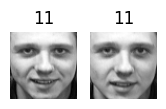

Cluster 78


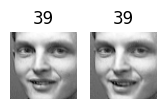

Cluster 79


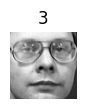

Cluster 80


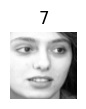

Cluster 81


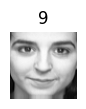

Cluster 82


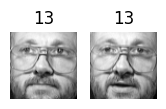

Cluster 83


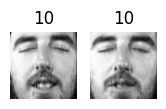

Cluster 84


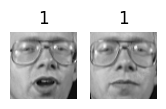

Cluster 85


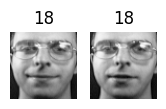

Cluster 86


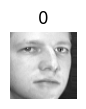

Cluster 87


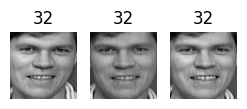

Cluster 88


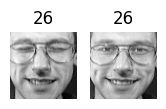

Cluster 89


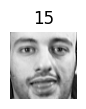

Cluster 90


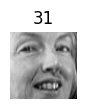

Cluster 91


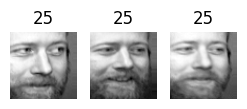

Cluster 92


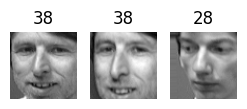

Cluster 93


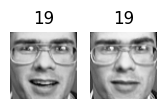

Cluster 94


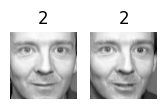

Cluster 95


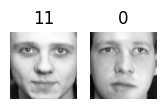

Cluster 96


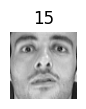

Cluster 97


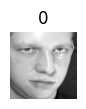

Cluster 98


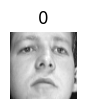

Cluster 99


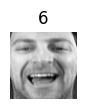

Cluster 100


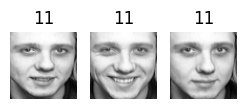

Cluster 101


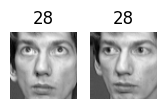

Cluster 102


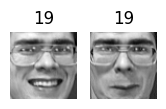

Cluster 103


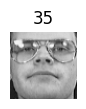

Cluster 104


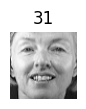

Cluster 105


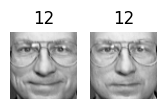

Cluster 106


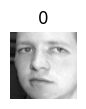

Cluster 107


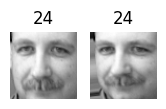

Cluster 108


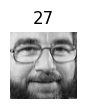

Cluster 109


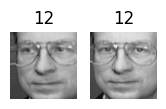

Cluster 110


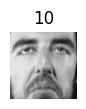

Cluster 111


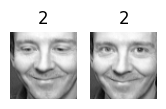

Cluster 112


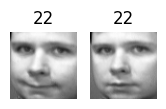

Cluster 113


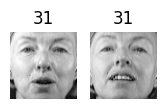

Cluster 114


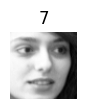

Cluster 115


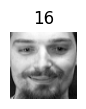

Cluster 116


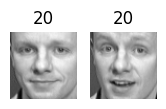

Cluster 117


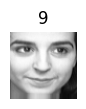

Cluster 118


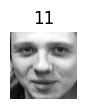

Cluster 119


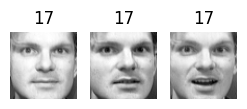

In [ ]:
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

In [ ]:
from sklearn.ensemble import  RandomForestClassifier
clf = RandomForestClassifier(random_state=42, n_estimators=150)
clf.fit(X_train_pca, y_train)
clf.score(X_valid_pca, y_valid)

0.925

In [ ]:
X_train_reduced = best_model.transform(X_train_pca)
X_valid_reduced= best_model.transform(X_valid_pca)
X_test_reduced = best_model.transform(X_test_pca)

clf= RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduced, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [ ]:
clf.score(X_valid_reduced, y_valid)

0.7

In [ ]:
from sklearn.pipeline import make_pipeline

for n_clusters in k_range:
  pipeline = make_pipeline(
      KMeans(n_clusters=n_clusters, n_init=10, random_state=42),
      RandomForestClassifier(n_estimators=150, random_state=42)
  )

  pipeline.fit(X_train_pca, y_train)

  print(n_clusters, pipeline.score(X_valid_pca, y_valid))

5 0.3875
10 0.575
15 0.6
20 0.6625
25 0.6625
30 0.6625
35 0.675
40 0.75
45 0.7375
50 0.725
55 0.7125
60 0.7125
65 0.7375
70 0.7375
75 0.7375
80 0.7875
85 0.75
90 0.75
95 0.7125
100 0.775
105 0.75
110 0.725
115 0.7125
120 0.7
125 0.75
130 0.725
135 0.725
140 0.7625
145 0.6875


In [ ]:
X_train_extended = np.c_[X_train_pca, X_train_reduced]
X_valid_extended = np.c_[X_valid_pca, X_valid_reduced]
X_test_extended = np.c_[X_test_pca, X_test_reduced]

In [ ]:
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_extended,y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [ ]:
clf.score(X_valid_extended, y_valid)

0.8125

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=40, random_state=42)
y_pred= gm.fit_predict(X_train_pca)

In [ ]:
n_gen_faces= 20
gen_faces_reduced, y_gen_faces = gm.sample(n_samples=n_gen_faces)
gen_faces = pca.inverse_transform(gen_faces_reduced)

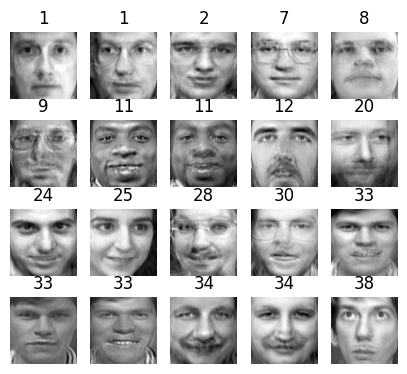

In [ ]:
plot_faces(gen_faces, y_gen_faces)

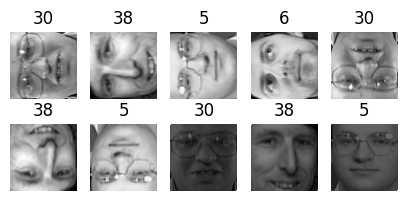

In [ ]:
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0,2,1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1,64,64)[:, ::-1]
flipped = flipped.reshape(-1,64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated,flipped,darkened]
y_bad = np.concatenate([y_rotated,y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [ ]:
X_bad_faces_pca = pca.transform(X_bad_faces)

In [ ]:
gm.score_samples(X_bad_faces_pca)

array([-2.43643204e+07, -1.89785069e+07, -3.78112003e+07, -4.98187696e+07,
       -3.20479134e+07, -1.37531191e+07, -2.92373992e+07, -1.05489070e+08,
       -1.19575362e+08, -6.74256974e+07])

In [ ]:
gm.score_samples(X_train_pca[:10])

array([1163.02020819, 1134.03637837, 1156.32132864, 1170.67602759,
       1141.45404766, 1154.35205071, 1091.32894453, 1111.41149348,
       1096.43048989, 1132.98982561])

In [ ]:
X_train_pca.round(2)

array([[  3.78,  -1.85,  -5.14, ...,  -0.14,  -0.21,   0.06],
       [ 10.15,  -1.53,  -0.77, ...,   0.12,  -0.14,  -0.02],
       [-10.02,   2.88,  -0.92, ...,   0.07,  -0.  ,   0.12],
       ...,
       [  2.48,   2.96,   1.3 , ...,  -0.02,   0.03,  -0.15],
       [ -3.22,   5.35,   1.39, ...,   0.06,  -0.23,   0.16],
       [ -0.92,  -3.65,   2.26, ...,   0.14,  -0.07,   0.06]],
      dtype=float32)

In [ ]:
def reconstruction_errors(pca,X):
  X_pca = pca.transform(X)
  X_reconstructed = pca.inverse_transform(X_pca)
  mse = np.square(X_reconstructed - X).mean(axis=-1)
  return mse

In [ ]:
reconstruction_errors(pca, X_train).mean()

0.00019205349

In [ ]:
reconstruction_errors(pca, X_bad_faces).mean()

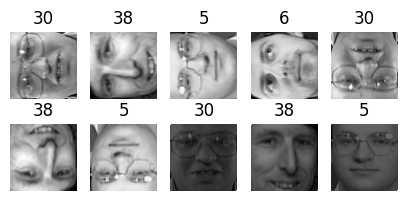

In [ ]:
plot_faces(X_bad_faces, y_bad)

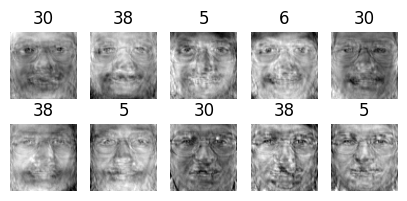

In [ ]:
X_bad_faces_reconstructed = pca.inverse_transform(X_bad_faces_pca)
plot_faces(X_bad_faces_reconstructed, y_bad)